In [1]:
from tg.grammar_ru.corpus import CorpusBuilder
from tg.grammar_ru.features import PyMorphyFeaturizer, SlovnetFeaturizer, SyntaxStatsFeaturizer, SyntaxTreeFeaturizer
from pathlib import Path
from tg.projects.retell.retell_utils.metrics import get_cosine_sim, get_jaccard_index,plot_bar_jac_cos_metric
import numpy as np
from tg.grammar_ru.corpus import CorpusReader
from tg.projects.retell.translate.utils import get_array_chapters,translate, jac_metric
from tg.grammar_ru.common.loc import Loc


## Формируем корпуса для русского и английского переводов

In [2]:
print(Loc.root_path/"corpus/example/processed/ru")

c:\users\nikya\pycharmprojects\grammar\grammar_ru\corpus\example\processed\ru


In [3]:


CorpusBuilder.convert_interformat_folder_to_corpus(
        Path(Loc.root_path/'tg/projects/retell/translate/demo/ru_example.base.zip'),
        Path(Loc.root_path/"corpus/example/processed/ru"),
        ["Name"],
        
)


  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
CorpusBuilder.featurize_corpus(
        Path(Loc.root_path/'tg/projects/retell/translate/demo/ru_example.base.zip'),
        Path(Loc.root_path/'tg/projects/retell/translate/demo/ru_example.featurized.corpus.zip'),
        [
            PyMorphyFeaturizer(),
            SlovnetFeaturizer()
        ]
    )

2023-11-17 14:02:21.145375 INFO: Processing a05a0bf4-ad03-4b81-9ca1-4636c441f1a6 at #0, total 7 
2023-11-17 14:02:21.146401 INFO: <class 'tg.grammar_ru.features.pymorphy_featurizer.PyMorphyFeaturizer'>
2023-11-17 14:02:21.212334 INFO: <class 'tg.grammar_ru.features.slovnet_featurizer.SlovnetFeaturizer'>
2023-11-17 14:02:21.331746 INFO: Processing a09f424b-58fb-497a-b76b-2fef839156e7 at #1, total 7 
2023-11-17 14:02:21.332759 INFO: <class 'tg.grammar_ru.features.pymorphy_featurizer.PyMorphyFeaturizer'>
2023-11-17 14:02:21.418652 INFO: <class 'tg.grammar_ru.features.slovnet_featurizer.SlovnetFeaturizer'>
2023-11-17 14:02:21.576932 INFO: Processing 65687e17-9b33-47bc-b6df-9bfc45509b2e at #2, total 7 
2023-11-17 14:02:21.577950 INFO: <class 'tg.grammar_ru.features.pymorphy_featurizer.PyMorphyFeaturizer'>
2023-11-17 14:02:21.614198 INFO: <class 'tg.grammar_ru.features.slovnet_featurizer.SlovnetFeaturizer'>
2023-11-17 14:02:21.716058 INFO: Processing f1d956f2-a476-49fd-a294-e16480fe3e18 at #

In [5]:


ru_retell_corpus = CorpusReader(Path(Loc.root_path/'tg/projects/retell/translate/demo/ru_example.featurized.corpus.zip'))

ru_retell_corpus.get_toc() 


,filename,timestamp,part_index,token_count,character_count,ordinal,header_0,headers,Name,max_id
file_id,,,,,,,,,,
a05a0bf4-ad03-4b81-9ca1-4636c441f1a6,ru_retell.md,2023-11-17 14:02:20.304804,0,396,1814,0,Глава 1: Знакомство с Родионом,Глава 1: Знакомство с Родионом,ru_retell,397
a09f424b-58fb-497a-b76b-2fef839156e7,ru_retell.md,2023-11-17 14:02:20.332827,1,704,3090,1,Глава 2: Встреча с Мармеладовым,Глава 2: Встреча с Мармеладовым,ru_retell,11102
65687e17-9b33-47bc-b6df-9bfc45509b2e,ru_retell.md,2023-11-17 14:02:20.348862,2,280,1330,2,Глава 3: Письмо матери,Глава 3: Письмо матери,ru_retell,21383
f1d956f2-a476-49fd-a294-e16480fe3e18,ru_retell.md,2023-11-17 14:02:20.363948,3,461,2020,3,Глава 4: Мысли о сестре,Глава 4: Мысли о сестре,ru_retell,31845
9837e0fe-53c9-4713-afeb-a5f3799733d1,ru_retell.md,2023-11-17 14:02:20.384767,4,193,892,4,Глава 5: Сон Раскольникова,Глава 5: Сон Раскольникова,ru_retell,42039
a9152f35-6925-491c-a86f-14cbaa91fbdf,ru_retell.md,2023-11-17 14:02:20.401459,5,330,1457,5,Глава 6: Подготовка к убийству,Глава 6: Подготовка к убийству,ru_retell,52370
6dab7bea-cc6d-4dec-bd17-7129ad3e493e,ru_retell.md,2023-11-17 14:02:20.417401,6,308,1383,6,Глава 7: Преступление,Глава 7: Преступление,ru_retell,62679


In [6]:
CorpusBuilder.convert_interformat_folder_to_corpus(
        Path(Loc.root_path/'tg/projects/retell/translate/demo/eng_example.base.zip'),
        Path(Loc.root_path/"corpus/example/processed/eng"),
        ["Name"],
        
)

  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
CorpusBuilder.featurize_corpus(
        Path(Loc.root_path/'tg/projects/retell/translate/demo/eng_example.base.zip'),
        Path(Loc.root_path/'tg/projects/retell/translate/demo/eng_example.featurized.corpus.zip'),
        [
            PyMorphyFeaturizer(),
            SlovnetFeaturizer()
        ]
    )

2023-11-17 14:02:23.719863 INFO: Processing 2a27a273-4c66-419f-9f54-cc3eebef8176 at #0, total 7 
2023-11-17 14:02:23.720881 INFO: <class 'tg.grammar_ru.features.pymorphy_featurizer.PyMorphyFeaturizer'>
2023-11-17 14:02:23.776253 INFO: <class 'tg.grammar_ru.features.slovnet_featurizer.SlovnetFeaturizer'>
2023-11-17 14:02:23.925553 INFO: Processing 64c68eaa-6d79-4bd5-96d1-2211eb6c74bd at #1, total 7 
2023-11-17 14:02:23.926571 INFO: <class 'tg.grammar_ru.features.pymorphy_featurizer.PyMorphyFeaturizer'>
2023-11-17 14:02:23.981172 INFO: <class 'tg.grammar_ru.features.slovnet_featurizer.SlovnetFeaturizer'>
2023-11-17 14:02:24.157639 INFO: Processing b972a84d-e429-4c3e-bafb-64afb30f4856 at #2, total 7 
2023-11-17 14:02:24.157639 INFO: <class 'tg.grammar_ru.features.pymorphy_featurizer.PyMorphyFeaturizer'>
2023-11-17 14:02:24.208072 INFO: <class 'tg.grammar_ru.features.slovnet_featurizer.SlovnetFeaturizer'>
2023-11-17 14:02:24.364714 INFO: Processing 388b280f-a018-49ab-9885-f3dffd326162 at #

In [8]:
en_retell_corpus = CorpusReader(Path(Loc.root_path/'tg/projects/retell/translate/demo/eng_example.featurized.corpus.zip'))

en_retell_corpus.get_toc() 

,filename,timestamp,part_index,token_count,character_count,ordinal,header_0,headers,Name,max_id
file_id,,,,,,,,,,
2a27a273-4c66-419f-9f54-cc3eebef8176,eng_retell.md,2023-11-17 14:02:22.938768,0,782,3092,0,Chapter 1:,Chapter 1:,eng_retell,783
64c68eaa-6d79-4bd5-96d1-2211eb6c74bd,eng_retell.md,2023-11-17 14:02:22.944236,1,783,3274,1,Chapter 2:,Chapter 2:,eng_retell,11567
b972a84d-e429-4c3e-bafb-64afb30f4856,eng_retell.md,2023-11-17 14:02:22.961587,2,729,3015,2,Chapter 3:,Chapter 3:,eng_retell,22297
388b280f-a018-49ab-9885-f3dffd326162,eng_retell.md,2023-11-17 14:02:22.978265,3,739,2927,3,Chapter 4:,Chapter 4:,eng_retell,33037
b12511e2-d059-4003-b677-2a2c07d48a22,eng_retell.md,2023-11-17 14:02:22.994891,4,917,3598,4,Chapter 5:,Chapter 5:,eng_retell,43955
366fcf47-bc34-4211-9c2f-467f1e1c6c50,eng_retell.md,2023-11-17 14:02:23.010889,5,1024,4168,5,Chapter 6:,Chapter 6:,eng_retell,54980
4ab7f6aa-5455-46a6-9aab-a4cf691b3556,eng_retell.md,2023-11-17 14:02:23.028413,6,1030,4085,6,Chapter 7:,Chapter 7:,eng_retell,66011


## Получаем текст пересказа из полученных корпусов

In [9]:
ru_retell = get_array_chapters(ru_retell_corpus)

print(ru_retell[0])

В Петербурге жаркое и душное лето .
Один молодой человек выходит из своей каморки , пытаясь избежать встречи с хозяйкой — он давно уже не платит за квартиру .
Его гордость страдает от этого , а потому настроение героя нельзя назвать хорошим .
В последнее время он вообще стал напоминать ипохондрика : тяготился обществом людей , избегал их и говорил преимущественно сам с собой .
Выйдя на улицу , он обдумывает какое-то таинственное дело , на которое он якобы не способен .
Его тревожит , что он не соответствует тому делу , на которое решился .
Герой нарочно растравляет себя мыслями о том , что ему не по плечу задуманное .
Колорит улиц вторит его мрачным думам : везде пьяные и развратные люди , крики , невеселый смех .
На улице его грубо окликнули « немецким шляпником » из-за его дырявой рыжей шляпы с пятнами , о которой герой задумался с испугом , но не стыдом .
Он рассуждает про себя , что шляпа погубит все дело .
Она слишком приметная .
Но весь вид молодого человека был таковым : он был 

In [21]:
true_retell = get_array_chapters(en_retell_corpus)

print(true_retell[0])

It is early July in St .
Petersburg , and very hot .
A good-looking young man who is nearly destitute and greatly in debt to his landlady manages to slip out of the house unnoticed .
He is relieved , not because he is a coward by nature but because he has been irritable and tense for some time and dreads meeting anyone at all , let alone his landlady .
The young man thinks to himself in a rapidly rambling fashion about some unknown deed which he seems torn about committing .
On the one hand , he wants to do it , but on the other he tries to convince himself that he is merely toying with the idea and isn ' t serious about pursuing it into action .
The youth is revolted by the heat and stench of his surroundings , but loses himself in his thoughts , which sometimes become muddled as he has not eaten much in two days .
He is roused from his reverie by a drunk shouting an insult about his hat .
Suddenly afraid , he clutches his hat , and mutters feverishly to himself that the hat is too co

## Переводим текст из английского пересказа

In [22]:

trans_retell = translate(true_retell)
print(trans_retell[0])

В Санкт-Петербурге начало июля.
В Петербурге, и очень жарко.
Симпатичному молодому человеку, почти нищему и сильно обязанному своей хозяйке, удается незаметно выскользнуть из дома.
Он чувствует облегчение не потому, что он трус по натуре, а потому, что с некоторых пор он раздражителен и напряжен и боится вообще с кем-либо встречаться, не говоря уже о своей хозяйке.
Молодой человек быстро и бессвязно думает о каком-то неизвестном поступке, о совершении которого он, кажется, рвется.
С одной стороны, он хочет это сделать, но с другой, он пытается убедить себя, что он просто играет с идеей и несерьезно претворяет ее в жизнь.
Юноша испытывает отвращение к жаре и смраду окружающей среды, но теряется в своих мыслях, которые иногда путаются, поскольку он почти ничего не ел за два дня.
Его выводит из задумчивости пьяный, выкрикивающий оскорбления в адрес его шляпы.
Внезапно испугавшись, он хватается за шляпу и лихорадочно бормочет про себя, что шляпа слишком бросается в глаза и ее можно "замети

## Выводим индекс Жаккара для перевода и и русского пересказа

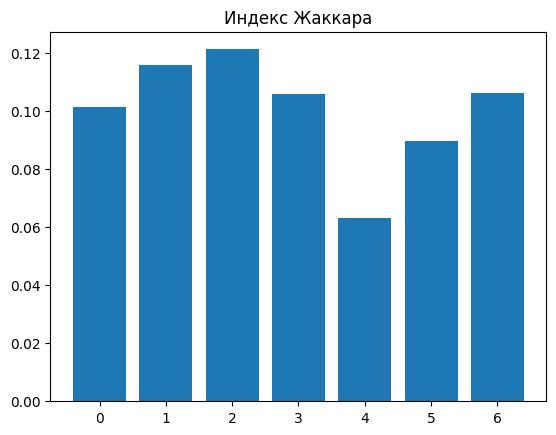

In [23]:
jaccard_sim = np.array([get_jaccard_index(ru_retell[i],trans_retell[i]) for i in range(len(trans_retell))])
jac_metric(jaccard_sim)



## Записываем получившийся перевод в md файл

In [25]:
from yo_fluq_ds import FileIO

result = ''

for text in trans_retell:
    result += text


FileIO.write_text(result, Path(Loc.root_path/"corpus/example/processed/ru/translate.md"))


## Создаем корпус для перевода

In [26]:
CorpusBuilder.convert_interformat_folder_to_corpus(
    Path(Loc.root_path/'tg/projects/retell/translate/demo/translate.base.zip'),
    Path(Loc.root_path/"corpus/example/processed/eng"),
    ["Name"],
        
)

  0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
CorpusBuilder.featurize_corpus(
        Path(Loc.root_path/'tg/projects/retell/translate/demo/translate.base.zip'),
        Path(Loc.root_path/'tg/projects/retell/translate/demo/translate.featurized.corpus.zip'),
        [
            PyMorphyFeaturizer(),
            SlovnetFeaturizer()
        ]
    )

2023-11-17 14:24:18.626687 INFO: Processing faf426ca-0935-4705-8d5d-5dd684e3e24b at #0, total 7 
2023-11-17 14:24:18.627749 INFO: <class 'tg.grammar_ru.features.pymorphy_featurizer.PyMorphyFeaturizer'>
2023-11-17 14:24:18.736869 INFO: <class 'tg.grammar_ru.features.slovnet_featurizer.SlovnetFeaturizer'>
2023-11-17 14:24:18.967684 INFO: Processing 48b91a4c-b498-47eb-b97e-34ca6d390a45 at #1, total 7 
2023-11-17 14:24:18.968699 INFO: <class 'tg.grammar_ru.features.pymorphy_featurizer.PyMorphyFeaturizer'>
2023-11-17 14:24:19.074100 INFO: <class 'tg.grammar_ru.features.slovnet_featurizer.SlovnetFeaturizer'>
2023-11-17 14:24:19.343419 INFO: Processing 20bd2a55-d9d9-4061-9b6b-29e29351ac71 at #2, total 7 
2023-11-17 14:24:19.345429 INFO: <class 'tg.grammar_ru.features.pymorphy_featurizer.PyMorphyFeaturizer'>
2023-11-17 14:24:19.446201 INFO: <class 'tg.grammar_ru.features.slovnet_featurizer.SlovnetFeaturizer'>
2023-11-17 14:24:19.694329 INFO: Processing 3fba319a-db88-40e5-8988-901bc2f4b228 at #